# CRISP-DM
### > Bussines Understanding
 Kartu kredit adalah alat keuangan yang memungkinkan individu dan bisnis melakukan pembelian secara kredit. Kartu kredit adalah kartu yang dikeluarkan oleh lembaga keuangan, seperti bank atau credit union, yang memberikan jalur kredit bergulir kepada pemegang kartu.
 
 Kartu kredit menyediakan metode pembayaran yang nyaman dan diterima secara luas, memungkinkan seseorang melakukan pembelian secara online, di toko, dan melalui telepon. Mereka dapat bermanfaat untuk mengelola arus kas, membangun riwayat kredit, dan mendapatkan hadiah. Namun, penting untuk menggunakan kartu kredit secara bertanggung jawab, menghindari hutang berlebihan, dan melakukan pembayaran tepat waktu untuk menjaga status keuangan yang sehat.
 Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) Saya bertujuan untuk menganalisis nasabah dengan menggunakan model K-means sehingga dapat memahami jenis nasabah. Dengan menggunakan teknik ini, kami dapat mengelompokkan nasabah berdasarkan pola dan karakteristik yang serupa dalam perilaku keuangan mereka.

 Saya berharap dapat mengidentifikasi klasifikasi nasabah yang berbeda berdasarkan faktor seperti tingkat pengeluaran, kestabilan pendapatan, preferensi pembayaran, dan pola penggunaan kartu kredit. Dengan memahami jenis nasabah yang berbeda, saya berharap dapat pengembangkan strategi yang lebih efektif untuk mempertahankan nasabah yang bernilai tinggi bagi bisnis kartu kredit ini.





### 2. Data Understanding 
 CUST_ID : Identitas data costumer berupa ID

 BALANCE : Saldo Tersisa di akun .

 BALANCE_FREQUENCY : Berapa sering saldo di update , berdasarkan score antara 0 dan 1.
 
 PURCHASES : Jumlah dari pembelian yang dibuat pengguna.
 
 ONEOFF_PURCHASES : Pembelian terbanyak yang dilakukan sekaligus.
 
 INSTALLMENTS_PURCHASES : Banyaknya pembelian lunas yang di angsur.
 
 CASH_ADVANCE : Uang muka yang diberikan pengguna.
 
 PURCHASES_FREQUENCY : Seberapa sering pembelian di lakukan , bedasarkan antara 0 dan 1 
 
 ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi sekaligus berdasarkan skor 
 antara 0 dan 1
 
 PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian dengan cicilan dilakukan 
 berdasarkan skor antara 0 dan 1
 
 CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayar.
 
 CASHADVANCETRX : Jumlah transaksi yang dilakukan menggunakan uang muka.
 
 PURCHASES_TRX : Banyaknya transaksi Pembelian dilakukan.
 
 CREDIT_LIMIT : Batas dari nominal kartu kredit untuk user .
 
 PAYMENTS : Banyaknya pembayaran yang lunas dari pengguna.
 
 MINIMUM_PAYMENTS : Minimum pembayaran yang dilakukan oleh pengguna
 
 PRCFULLPAYMENT : Presentasi dari pembayaran penuh(lunas) yang dibayar oleh pengguna.
 
 TENURE : Tenor layanan kartu kredit untuk pengguna.

# Import Library yang dibutuhkan

In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca Dataset

In [505]:
df =  pd.read_csv('CC GENERAL.csv')

In [506]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### > Data Preparation

In [507]:
#Memilih fitur yang akan digunakan.
features = ['BALANCE','PURCHASES']
X = df[features]

Data Balance(Saldo) dan Purchases(Pembelian) digunakan sebagai acuan ,karena memiliki hasil yang lebih stabil dan mudah dipahami dibandingkan dengan menggunakan kombinasi dari data yang lain.

In [508]:
print(X)

          BALANCE  PURCHASES
0       40.900749      95.40
1     3202.467416       0.00
2     2495.148862     773.17
3     1666.670542    1499.00
4      817.714335      16.00
...           ...        ...
8945    28.493517     291.12
8946    19.183215     300.00
8947    23.398673     144.40
8948    13.457564       0.00
8949   372.708075    1093.25

[8950 rows x 2 columns]


In [509]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

## Clustering

Melakukan clustering dan menentukan jumlah cluster optimal menggunakan elbow.

c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

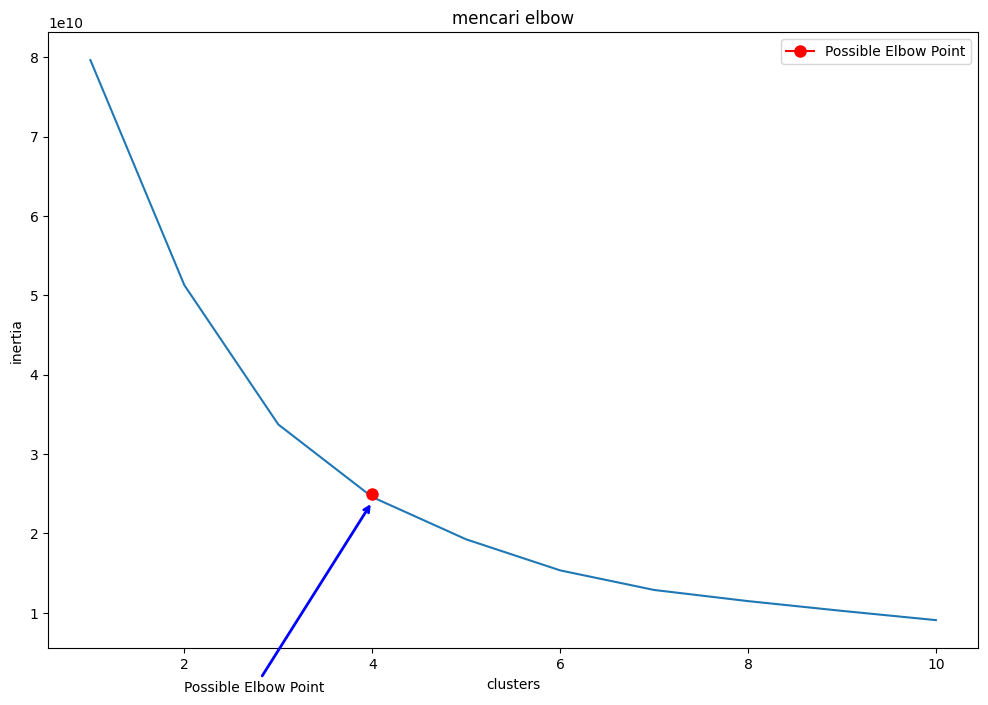

In [510]:
clusters=[]
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')
#Membuat panah Elbow
ax.annotate('Possible Elbow Point', xy=(4, 24000000000), xytext=(2, 24000000),
                     arrowprops=dict(color='blue', arrowstyle='->', lw=2))
#Membuat titik
plt.plot(4, 25000000000, marker='o', markersize=8, color='red', label='Possible Elbow Point')
plt.legend()
#Menampilkan Plot
plt.show()

Jumlah cluster optimal menurut elbow adalah 2 hingga 8 , saya memilih menggunakan 4 cluster.

In [511]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atep8\AppData\Local\Temp\ipykernel_9128\2472682596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = kmean.labels_


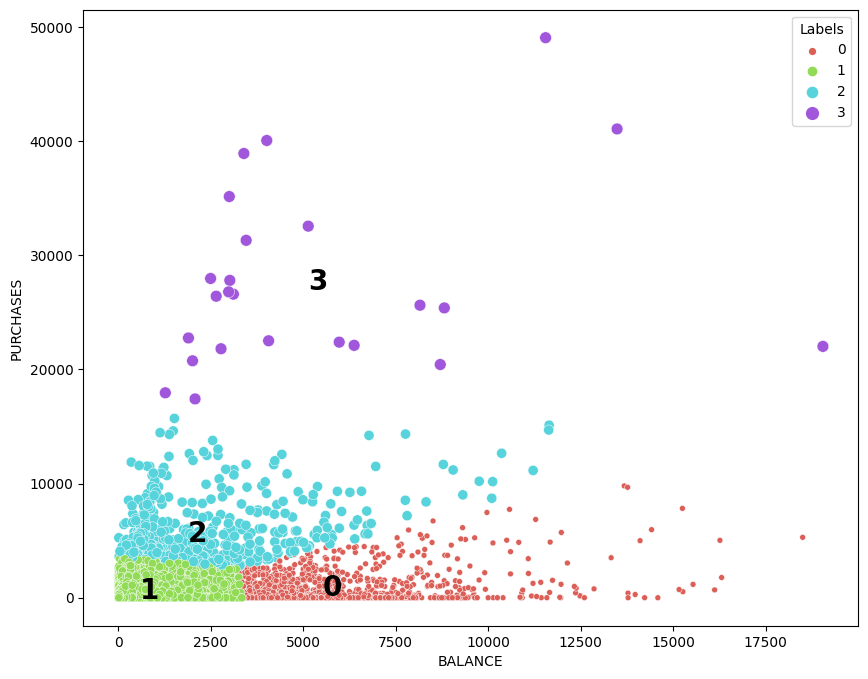

In [512]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Labels', markers=True, size='Labels', palette=sns.color_palette('hls', n_clust), data=X)

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels']==label]['BALANCE'].mean(),
                  X[X['Labels']==label]['PURCHASES'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20,
                 weight='bold',
                 color='black')

## Evaluasi data

In [513]:
print(X)

          BALANCE  PURCHASES  Labels
0       40.900749      95.40       1
1     3202.467416       0.00       1
2     2495.148862     773.17       1
3     1666.670542    1499.00       1
4      817.714335      16.00       1
...           ...        ...     ...
8945    28.493517     291.12       1
8946    19.183215     300.00       1
8947    23.398673     144.40       1
8948    13.457564       0.00       1
8949   372.708075    1093.25       1

[8950 rows x 3 columns]


In [514]:
cluster_size = X.groupby(['Labels'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Labels,size,Percentage
0,0,1153,0.128827
1,1,7227,0.807486
2,2,546,0.061006
3,3,24,0.002682


Dari proses clustering diatas nasabah dibagi menjadi 4 label ;

>Cluster 0 , adalah nasabah yang memiliki data pembelian yang kecil dengan saldo yang cenderung besar, untuk nasabah di cluster ini perlu diperhatikan dan di beri penawaran yang menarik sehingga saldo yang besar pada akunnya dapat dimanfaatkan sesuai dengan saldonya.

>Cluster 1 , adalah nasabah yang memiliki data pembelian dan saldo terkecil. untuk nasabah di cluster ini alangkah baiknya diberi penawaran dengan harga transaksi yang terbilang kecil sehingga nasabah dapat menyesuaikan dengan saldo nya.

>Cluster 2 , adalah nasabah yang memiliki data pembelian yang sedang dengan saldo yang cenderung kecil , untuk nasabah di cluster ini memiliki angka yang optimal karena saldo dan pembelian termasuk sudah optimal.

>Cluster 3 , adalah nasabah yang memiliki data pembelian dan saldo rata rata sedang. Untuk nasabah di cluster ini lebih baik untuk di beri pengarahan untuk menyesuaikan saldo dengan jumlah pembelian sehingga nasabah tersebut tidak memiliki pembelian yang besar dengan saldo yang cenderung kecil.



Dapat disimpulkan bahwa label dengan jumlah data terbanyak adalah label 1, yang memiliki persentase sekitar 80,75% dari total data. Sementara itu, label 3 memiliki jumlah data yang paling sedikit dengan persentase sekitar 0,27% dari total data.


## Save data

In [518]:
X.to_excel("CCClust.xlsx")

In [516]:
import pickle

In [517]:
pickle.dump(kmean, open('CC GENERAL.sav','wb'))